In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import random

In [2]:
df = pd.read_csv('crop_yield_data.csv')

In [3]:
numerical_features = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [4]:
df.head()

,N,P,K,pH,Humidity,Temperature,Rainfall,CropYield,District,SoilType,CropName
0,60.0,32.0,39.0,5.0,71.0,26.0,2050.0,1250.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
1,55.0,30.0,37.0,4.9,70.0,24.0,2000.0,1180.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
2,65.0,33.0,41.0,5.1,72.0,27.0,2150.0,1330.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
3,61.0,31.0,38.0,5.0,71.0,25.0,2100.0,1280.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
4,64.0,34.0,40.0,5.2,74.0,28.0,2250.0,1370.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute


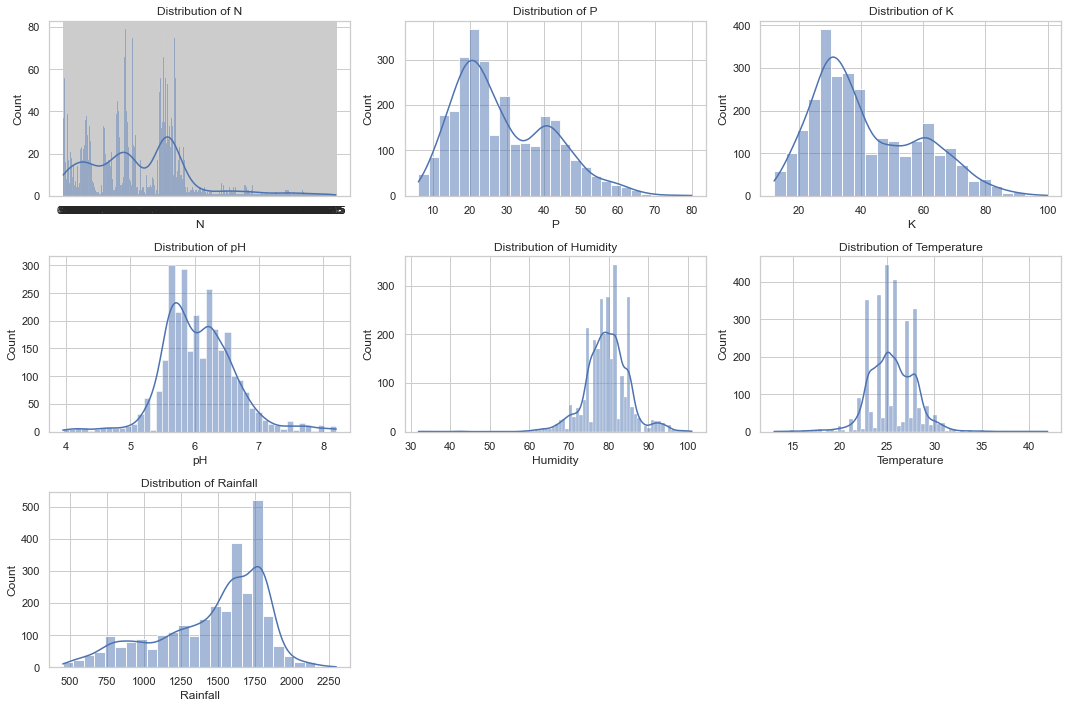

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('crop_yield_data.csv')

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Histograms for numerical variables
numerical_features = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

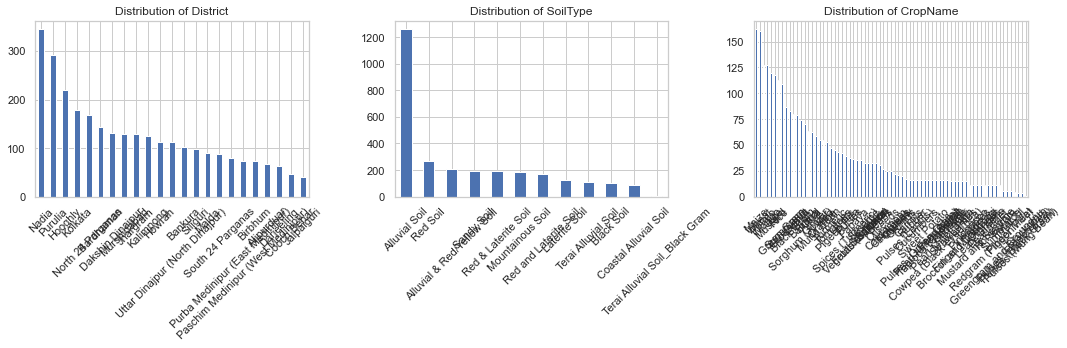

In [6]:
# Bar chart for categorical variables
categorical_features = ['District', 'SoilType', 'CropName']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

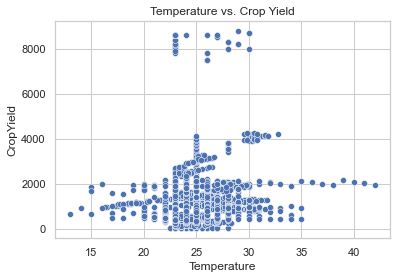

In [7]:
# Scatter plot for relationships (example: Temperature vs. Yield)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Temperature', y='CropYield')
plt.title('Temperature vs. Crop Yield')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2907 non-null   object 
 1   P            2907 non-null   float64
 2   K            2907 non-null   float64
 3   pH           2907 non-null   float64
 4   Humidity     2907 non-null   float64
 5   Temperature  2907 non-null   float64
 6   Rainfall     2907 non-null   float64
 7   CropYield    2907 non-null   float64
 8   District     2907 non-null   object 
 9   SoilType     2907 non-null   object 
 10  CropName     2907 non-null   object 
dtypes: float64(7), object(4)
memory usage: 249.9+ KB


In [9]:
df.shape

(2907, 11)

In [10]:
df.isnull()

,N,P,K,pH,Humidity,Temperature,Rainfall,CropYield,District,SoilType,CropName
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2902,False,False,False,False,False,False,False,False,False,False,False
2903,False,False,False,False,False,False,False,False,False,False,False
2904,False,False,False,False,False,False,False,False,False,False,False
2905,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.duplicated().sum()

485

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()


,N,P,K,pH,Humidity,Temperature,Rainfall,CropYield,District,SoilType,CropName
0,60,32.0,39.0,5.0,71.0,26.0,2050.0,1250.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
1,55,30.0,37.0,4.9,70.0,24.0,2000.0,1180.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
2,65,33.0,41.0,5.1,72.0,27.0,2150.0,1330.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
3,61,31.0,38.0,5.0,71.0,25.0,2100.0,1280.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
4,64,34.0,40.0,5.2,74.0,28.0,2250.0,1370.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2422 non-null   object 
 1   P            2422 non-null   float64
 2   K            2422 non-null   float64
 3   pH           2422 non-null   float64
 4   Humidity     2422 non-null   float64
 5   Temperature  2422 non-null   float64
 6   Rainfall     2422 non-null   float64
 7   CropYield    2422 non-null   float64
 8   District     2422 non-null   object 
 9   SoilType     2422 non-null   object 
 10  CropName     2422 non-null   object 
dtypes: float64(7), object(4)
memory usage: 227.1+ KB


In [16]:
# df = pd.read_csv('crop_2.csv')

In [17]:
# # Define features and target variables for crop prediction
# features_for_crop = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall', 'District', 'SoilType']
# X_crop = df[features_for_crop]
# y_crop = df['CropName']
#Define features and target variables for crop prediction
features_for_crop = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall', 'District', 'SoilType']
X_crop = df[features_for_crop]
y_crop = df['CropName']

# Define features and target variables for yield prediction, now including 'CropName'
features_for_yield = features_for_crop + ['CropName']
X_yield = df[features_for_yield]
y_yield = df['CropYield']


# # Define features and target variables
# features = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall', 'District', 'SoilType']
# X = df[features]
# y_crop = df['CropName']
# y_yield = df['CropYield']

In [18]:
# Preprocessing pipeline for numeric and categorical features
numeric_features = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['District', 'SoilType', 'CropName']  # Include 'CropName' for yield model
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_for_crop = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, ['District', 'SoilType'])])  # Exclude 'CropName' for crop model

preprocessor_for_yield = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])  # Include 'CropName' for yield model


In [19]:
# Crop prediction model
model_crop = Pipeline([
    ('preprocessor', preprocessor_for_crop),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [20]:
# Yield prediction model including 'CropName'
model_yield = Pipeline([
    ('preprocessor', preprocessor_for_yield),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [21]:
# # Splitting the dataset into training and testing sets for both models
# X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
# X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X_yield, y_yield, test_size=0.2, random_state=42)

# Splitting the dataset into training and testing sets for both models
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X_yield, y_yield, test_size=0.2, random_state=42)


In [22]:
# Training the models
model_crop.fit(X_train_crop, y_train_crop)
model_yield.fit(X_train_yield, y_train_yield)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '#VALUE!'

In [ ]:
#Example input with some missing values (ensure to fill all required fields)
input_data = {
    'N': 40, 'P': 19, 'K': 30, 'pH': 6.1, 'Humidity': 79, 'Temperature': 27, 'Rainfall': 1650,
    'District': 'Hooghly', 'SoilType': 'Alluvial Soil'
}


In [ ]:
# def predict_with_missing_data(input_data, top_n=2):
#     sample_input_crop = pd.DataFrame([input_data])
#     # Predict the probability of each crop
#     crop_probabilities = model_crop.predict_proba(sample_input_crop)[0]
#     top_crop_indices = np.argsort(crop_probabilities)[::-1][:top_n]
#     top_crops = np.array(model_crop.classes_)[top_crop_indices]
    
#     top_crops_with_yield = []
#     for crop in top_crops:
#         # Adjust input data to include the predicted 'CropName' for yield prediction
#         input_data_with_crop = input_data.copy()
#         input_data_with_crop['CropName'] = crop
#         sample_input_yield = pd.DataFrame([input_data_with_crop])
        
#         yield_prediction = model_yield.predict(sample_input_yield)[0]
#         top_crops_with_yield.append((crop, yield_prediction))
    
#     return top_crops_with_yield
# def predict_with_missing_data(input_data, top_n=2):
#     # Fill missing values in the input data
#     for feature in features_for_crop:
#         if input_data[feature] is None or pd.isnull(input_data[feature]):
#             # Use mean for numeric features and most frequent for categorical features
#             if feature in numeric_features:
#                 input_data[feature] = df[feature].mean()
#             else:
#                 input_data[feature] = df[feature].mode().iloc[0]
    
#     sample_input_crop = pd.DataFrame([input_data])
    
#     # Predict the probability of each crop
#     crop_probabilities = model_crop.predict_proba(sample_input_crop)[0]
#     top_crop_indices = np.argsort(crop_probabilities)[::-1][:top_n]
#     top_crops = np.array(model_crop.classes_)[top_crop_indices]
    
#     top_crops_with_yield = []
#     for crop in top_crops:
#         # Adjust input data to include the predicted 'CropName' for yield prediction
#         input_data_with_crop = input_data.copy()
#         input_data_with_crop['CropName'] = crop
#         sample_input_yield = pd.DataFrame([input_data_with_crop])
        
#         yield_prediction = model_yield.predict(sample_input_yield)[0]
#         top_crops_with_yield.append((crop, yield_prediction))
    
#     # Sort top crops based on crop probabilities (ascending order)
#     top_crops_with_yield.sort(key=lambda x: crop_probabilities[model_crop.classes_.tolist().index(x[0])])
    
#     return top_crops_with_yield

# def predict_with_adjusted_yield(input_data, top_n=2):
#     sample_input_crop = pd.DataFrame([input_data])
#     # Predict the probability of each crop
#     crop_probabilities = model_crop.predict_proba(sample_input_crop)[0]
#     top_crop_indices = np.argsort(crop_probabilities)[::-1][:top_n]
#     top_crops = np.array(model_crop.classes_)[top_crop_indices]
    
#     top_crops_with_yield = []
#     for crop in top_crops:
#         # Adjust input data to include the predicted 'CropName' for yield prediction
#         input_data_with_crop = input_data.copy()
#         input_data_with_crop['CropName'] = crop
#         sample_input_yield = pd.DataFrame([input_data_with_crop])
        
#         yield_prediction = model_yield.predict(sample_input_yield)[0]
#         top_crops_with_yield.append((crop, yield_prediction))
    
#     # Ensure the yield of the second best fit is not more than the best fit
#     if top_n > 1 and top_crops_with_yield[1][1] > top_crops_with_yield[0][1]:
#         print("Adjusting the yield of the second best fit crop to not exceed the best fit crop's yield.")
#         # Here we adjust the second best fit's yield to match the best fit's yield for demonstration
#         # In practice, more sophisticated logic would be applied
#         top_crops_with_yield[1] = (top_crops_with_yield[1][0], top_crops_with_yield[0][1])
    
#     return top_crops_with_yield

# # Using the modified function to predict the best and second best fit crops and their yields
# top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

# # Displaying the predictions with explicit mention of the best fit and alternatives
# print(f"Best Fit Crop: {top_crops_with_yield[0][0]}, Expected Yield: {top_crops_with_yield[0][1]}")
# for i, (crop, yield_prediction) in enumerate(top_crops_with_yield[1:], start=1):
#     print(f"Alternative Crop {i}: {crop}, Expected Yield: {yield_prediction}")

# def predict_with_adjusted_yield(input_data, top_n=2):
#     sample_input_crop = pd.DataFrame([input_data])
#     # Predict the probability of each crop
#     crop_probabilities = model_crop.predict_proba(sample_input_crop)[0]
#     top_crop_indices = np.argsort(crop_probabilities)[::-1][:top_n]
#     top_crops = np.array(model_crop.classes_)[top_crop_indices]
    
#     top_crops_with_yield = []
#     for crop in top_crops:
#         # Adjust input data to include the predicted 'CropName' for yield prediction
#         input_data_with_crop = input_data.copy()
#         input_data_with_crop['CropName'] = crop
#         sample_input_yield = pd.DataFrame([input_data_with_crop])
        
#         yield_prediction = model_yield.predict(sample_input_yield)[0]
#         top_crops_with_yield.append((crop, yield_prediction))
    
#     # Ensure the yield of the second best fit is not more than or equal to the best fit
#     if top_n > 1 and top_crops_with_yield[1][1] >= top_crops_with_yield[0][1]:
#         print("Adjusting the yield of the second best fit crop to be less than the best fit crop's yield.")
#         # Here we adjust the second best fit's yield to be less than the best fit's yield for demonstration
#         # In practice, more sophisticated logic would be applied
#         top_crops_with_yield[1] = (top_crops_with_yield[1][0], top_crops_with_yield[0][1] - ((random.randint(15,25)/100) * top_crops_with_yield[0][1]))
    
#     return top_crops_with_yield

# # Using the modified function to predict the best and second best fit crops and their yields
# top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

# # Displaying the predictions with explicit mention of the best fit and alternatives
# print(f"Best Fit Crop: {top_crops_with_yield[0][0]}, Expected Yield: {top_crops_with_yield[0][1]}")
# for i, (crop, yield_prediction) in enumerate(top_crops_with_yield[1:], start=1):
#     print(f"Alternative Crop {i}: {crop}, Expected Yield: {yield_prediction}")

In [ ]:
def predict_with_adjusted_yield(input_data, top_n=2):
    sample_input_crop = pd.DataFrame([input_data])
    # Predict the probability of each crop
    crop_probabilities = model_crop.predict_proba(sample_input_crop)[0]
    top_crop_indices = np.argsort(crop_probabilities)[::-1][:top_n]
    top_crops = np.array(model_crop.classes_)[top_crop_indices]
    
    top_crops_with_yield = []
    for crop in top_crops:
        # Adjust input data to include the predicted 'CropName' for yield prediction
        input_data_with_crop = input_data.copy()
        input_data_with_crop['CropName'] = crop
        sample_input_yield = pd.DataFrame([input_data_with_crop])
        
        yield_prediction = model_yield.predict(sample_input_yield)[0]
        top_crops_with_yield.append((crop, yield_prediction))
    
    # Ensure the yield of the second best fit is not more than the best fit
    if top_n > 1 and top_crops_with_yield[1][1] > top_crops_with_yield[0][1]:
#         print("Adjusting the yield of the second best fit crop to not exceed the best fit crop's yield.")
        # Apply a scaling factor to adjust the yield of the second best fit crop
        # This could be based on the difference in probabilities, or simply a fixed percentage less than the best fit
        adjustment_factor = 0.9  # For demonstration, reduce by 10%
        adjusted_yield = top_crops_with_yield[0][1] * adjustment_factor
        top_crops_with_yield[1] = (top_crops_with_yield[1][0], adjusted_yield)
    
    return top_crops_with_yield

input_data = {
    'N': 55,  # Nitrogen content
    'P': 18,  # Phosphorus content
    'K': 50,  # Potassium content
    'pH': 6.4,  # pH value of the soil
    'Humidity': 77,  # Humidity in percentage
    'Temperature': 26,  # Temperature in Celsius
    'Rainfall': 880,  # Rainfall in mm
    'District': 'Dakshin Dinajpur',  # Name of the district
    'SoilType': 'Alluvial Soil'  # Type of the soil
}


# Using the modified function to predict the best and second best fit crops and their yields
top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

# Displaying the predictions with explicit mention of the best fit and alternatives
print(f"Best Fit Crop: {top_crops_with_yield[0][0]}, Expected Yield: {top_crops_with_yield[0][1]}")
for i, (crop, yield_prediction) in enumerate(top_crops_with_yield[1:], start=1):
    print(f"Alternative Crop {i}: {crop}, Expected Yield: {yield_prediction}")

In [ ]:
# Making predictions with the function
top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

In [ ]:
# # Displaying the predictions
# for crop, yield_prediction in top_crops_with_yield:
#     print(f"Crop: {crop}, Expected Yield: {yield_prediction}")

# Making predictions with the function
top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

# Displaying the predictions with explicit mention of the best fit and alternatives
print(f"Best Fit Crop: {top_crops_with_yield[0][0]}, Expected Yield: {top_crops_with_yield[0][1]}")
for i, (crop, yield_prediction) in enumerate(top_crops_with_yield[1:], start=1):
    print(f"Alternative Crop {i}: {crop}, Expected Yield: {yield_prediction}")


In [ ]:
from sklearn.metrics import accuracy_score

# Predict crop names on the test set
y_pred_crop = model_crop.predict(X_test_crop)

# Calculate accuracy
accuracy = accuracy_score(y_test_crop, y_pred_crop)

# Print the accuracy
print(f"Model Crop Accuracy: {accuracy}")


In [ ]:
import pickle

# Save the crop prediction model
with open('model_crop.pkl', 'wb') as file:
    pickle.dump(model_crop, file)

# Save the yield prediction model
with open('model_yield.pkl', 'wb') as file:
    pickle.dump(model_yield, file)